# keras와 Pytorch비교
* make date : 2024-03-27
* 신재호

# keras cifar10분류

In [ ]:
from keras.datasets import cifar10
from keras.utils import to_categorical, Sequence
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.metrics import confusion_matrix

(X_train, y_train), (X_val, y_val) = cifar10.load_data()
label_name = ['plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 4s 0us/step


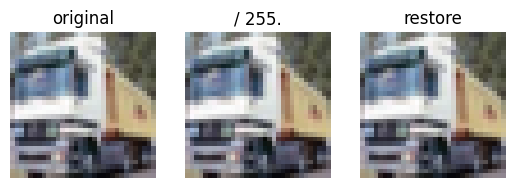

In [ ]:
plt.subplot(1,3,1)
plt.imshow(X_train[1])
plt.axis('off')
plt.title('original')

plt.subplot(1,3,2)
plt.imshow(X_train[1]/255.)
plt.axis('off')
plt.title('/ 255.')

plt.subplot(1,3,3)
a = X_train[1]/255. * 255.
plt.imshow(a.astype(int))
plt.axis('off')
plt.title('restore')

plt.show()

In [ ]:
X_train = X_train.reshape(-1,32,32,3)/255.
X_val = X_val.reshape(-1,32,32,3)/255.

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

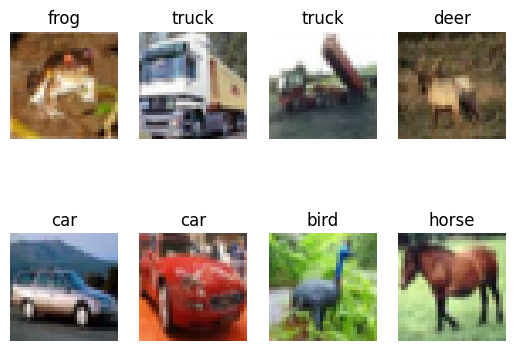

In [ ]:
for i in range(8):
  plt.subplot(2,4,i+1)
  restor_X = X_train[i] * 255.
  plt.imshow(restor_X.astype(int))
  plt.title(f'{label_name[y_train[i].argmax(0)]}')
  plt.axis('off')

In [ ]:
class DataLoader(Sequence):
  def __init__(self, batch_size, X, y):
    self.batch_size = batch_size
    self.X = X
    self.y = y

  def __getitem__(self, idx):
    start, end = idx * self.batch_size, (idx + 1) * self.batch_size
    return self.X[start:end], self.y[start:end]

  def __len__(self):
    return math.ceil(len(self.y)/self.batch_size)

def Simple_CNN():
  model = Sequential()
  model.add(Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)))
  model.add(BatchNormalization())
  model.add(Conv2D(64,(3,3),activation="relu"))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(128,activation = 'relu'))
  model.add(Dense(10, activation = 'softmax'))
  return model

In [ ]:
train_loader = DataLoader(32, X_train, y_train)
val_loader = DataLoader(32, X_val, y_val)


model = Simple_CNN()
model.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['acc'])
model_checkpoint = ModelCheckpoint(monitor = 'val_loss', save_best_only = True, verbose=1,
                                   filepath = '/content/keras_CNN.keras')
history = model.fit(train_loader, validation_data = val_loader, epochs = 10, callbacks = [model_checkpoint])

Epoch 1/10
1555/1563 [============================>.] - ETA: 0s - loss: 1.4526 - acc: 0.5146
Epoch 1: val_loss improved from inf to 1.23441, saving model to /content/keras_CNN.keras
1563/1563 [==============================] - 15s 7ms/step - loss: 1.4512 - acc: 0.5150 - val_loss: 1.2344 - val_acc: 0.5697
Epoch 2/10
1558/1563 [============================>.] - ETA: 0s - loss: 0.8016 - acc: 0.7195
Epoch 2: val_loss improved from 1.23441 to 1.07167, saving model to /content/keras_CNN.keras
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8016 - acc: 0.7196 - val_loss: 1.0717 - val_acc: 0.6328
Epoch 3/10
1562/1563 [============================>.] - ETA: 0s - loss: 0.4518 - acc: 0.8476
Epoch 3: val_loss did not improve from 1.07167
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4520 - acc: 0.8475 - val_loss: 1.1998 - val_acc: 0.6365
Epoch 4/10
1555/1563 [============================>.] - ETA: 0s - loss: 0.1889 - acc: 0.9465
Epoch 4: val_loss did not i

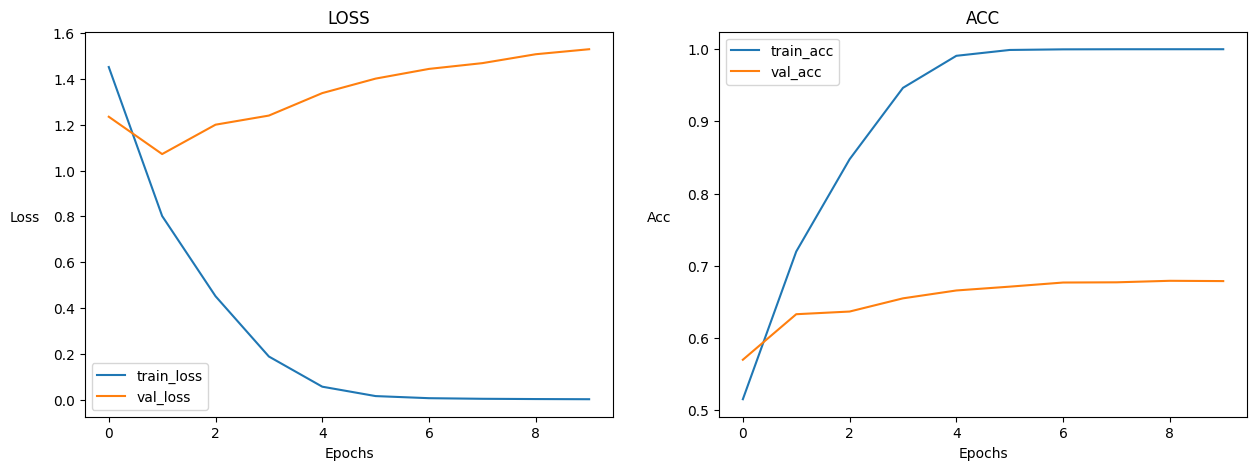

In [ ]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.title('LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss', rotation = 360, labelpad = 20)

plt.subplot(1,2,2)
plt.plot(history.history['acc'], label = 'train_acc')
plt.plot(history.history['val_acc'], label = 'val_acc')
plt.legend()
plt.title('ACC')
plt.xlabel('Epochs')
plt.ylabel('Acc', rotation = 360, labelpad = 20)

plt.show()


In [ ]:
def batch_extractor(batch_no, model, loader):
  for i, data in enumerate(loader):
    x, y = data
    imgs = x
    labels = y.argmax(1)
    if i == batch_no - 1:
      break
  preds = model.predict(imgs).argmax(1)
  imgs = imgs * 255.
  imgs = imgs.astype(int)
  extract_dict = {}
  extract_dict['imgs'] = imgs
  extract_dict['labels'] = labels
  extract_dict['preds'] = preds
  return extract_dict

1/1 [==============================] - 0s 102ms/step


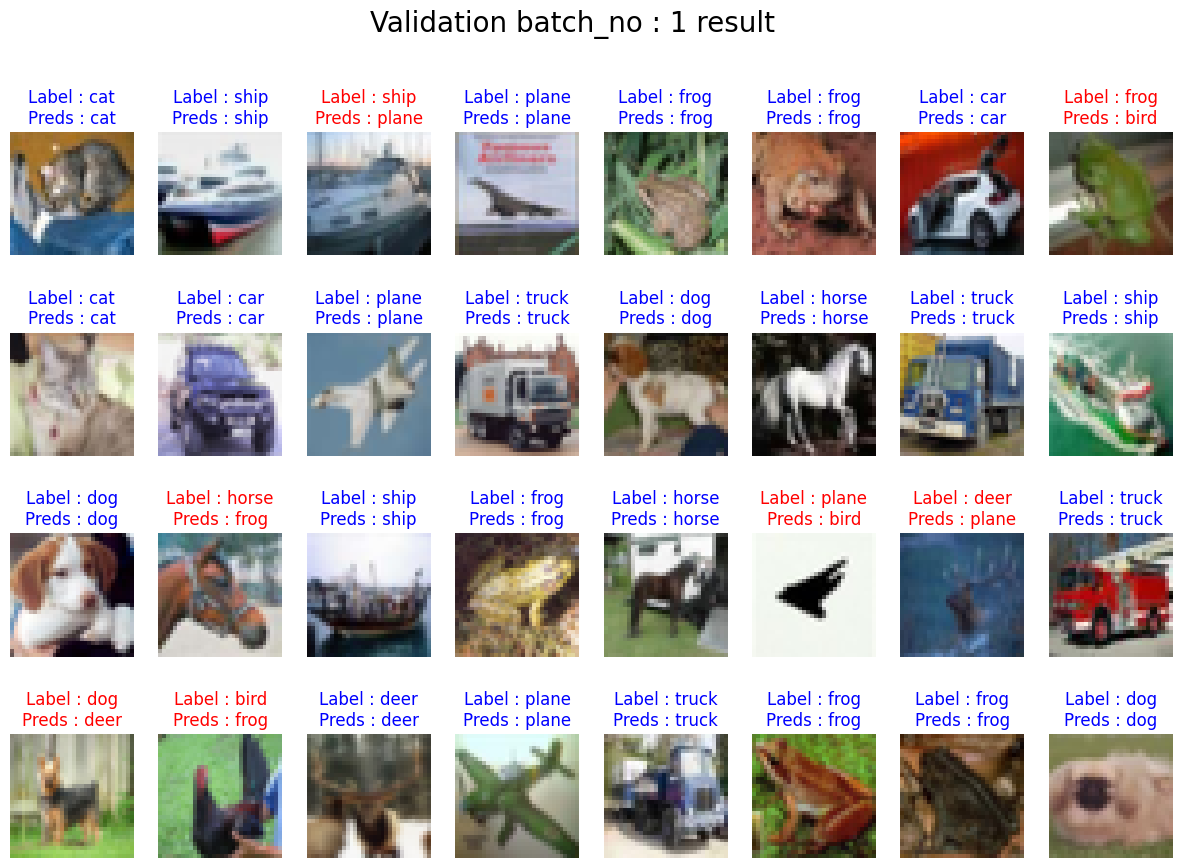

In [ ]:
batch_no = 1
extract_dict = batch_extractor(batch_no = batch_no, model = model, loader = val_loader)

plt.figure(figsize = (15,10))
for i in range(32):
  plt.subplot(4,8,i+1)
  plt.imshow(extract_dict['imgs'][i])
  plt.axis('off')
  if extract_dict['preds'][i] == extract_dict['labels'][i]:
    color = "blue"
  else:
    color = "red"
  plt.title(f'Label : {label_name[extract_dict["labels"][i]]}\nPreds : {label_name[extract_dict["preds"][i]]}', color = color)
plt.suptitle(f"Validation batch_no : {batch_no} result", fontsize = 20)
plt.show()

In [ ]:
preds = model.predict(X_val).argmax(1)
labels = y_val.argmax(1)

conf_array = np.zeros(10)
tmp_df = pd.DataFrame(conf_array)
conf_df = pd.DataFrame()
for i in range(10):
  conf_df = pd.concat([conf_df, tmp_df.T], axis = 0)
conf_df.index = [i for i in range(10)]

for i in range(len(preds)):
  conf_df.loc[labels[i], preds[i]] += 1
conf_df = conf_df.astype(int)
conf_df.index = label_name
conf_df.columns = label_name
conf_df

313/313 [==============================] - 1s 2ms/step


plane  car  bird  cat  deer  dog  frog  horse  ship  truck
plane    733   15    52   25    16   10    16     11    79     43
car       27  796     7   14     4    7     9      3    32    101
bird      65   12   551   73    93   68    72     34    14     18
cat       23   21    73  486    59  191    71     41    16     19
deer      28    5    89   59   609   39    64     85    17      5
dog       11   10    66  193    53  570    25     56    11      5
frog       8   12    37   60    43   32   786      9     7      6
horse     25    5    37   46    70   61    12    727     1     16
ship      83   61    15   13     5    7     8      6   781     21
truck     43   95    11   23     4    9    13     15    39    748

In [ ]:
pd.DataFrame(confusion_matrix(preds,labels))

0    1    2    3    4    5    6    7    8    9
0  733   27   65   23   28   11    8   25   83   43
1   15  796   12   21    5   10   12    5   61   95
2   52    7  551   73   89   66   37   37   15   11
3   25   14   73  486   59  193   60   46   13   23
4   16    4   93   59  609   53   43   70    5    4
5   10    7   68  191   39  570   32   61    7    9
6   16    9   72   71   64   25  786   12    8   13
7   11    3   34   41   85   56    9  727    6   15
8   79   32   14   16   17   11    7    1  781   39
9   43  101   18   19    5    5    6   16   21  748

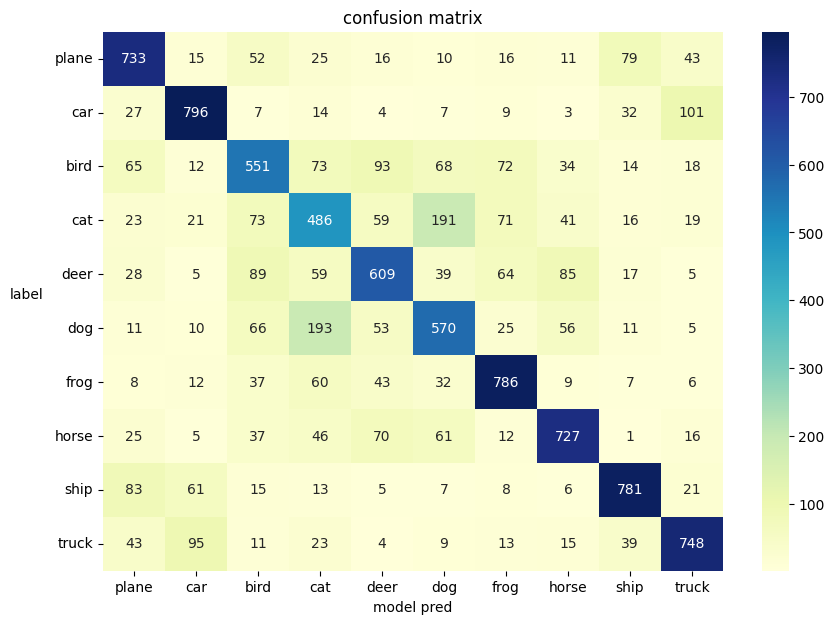

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(conf_df, annot = True, fmt = 'd', cmap='YlGnBu')
plt.yticks(rotation = 360)
plt.xlabel('model pred')
plt.ylabel('label', rotation = 360, labelpad = 20)
plt.title('confusion matrix')
plt.show()

In [ ]:
wrong_img = []
wrong_label = []
wrong_pred = []

for i in range(len(preds)):
  if preds[i] != labels[i]:
    restore_X = X_val[i] * 255.

    wrong_img.append(restore_X.astype(int))
    wrong_label.append(labels[i])
    wrong_pred.append(preds[i])

wrong_img = np.array(wrong_img)
wrong_label = np.array(wrong_label)
wrong_pred = np.array(wrong_pred)

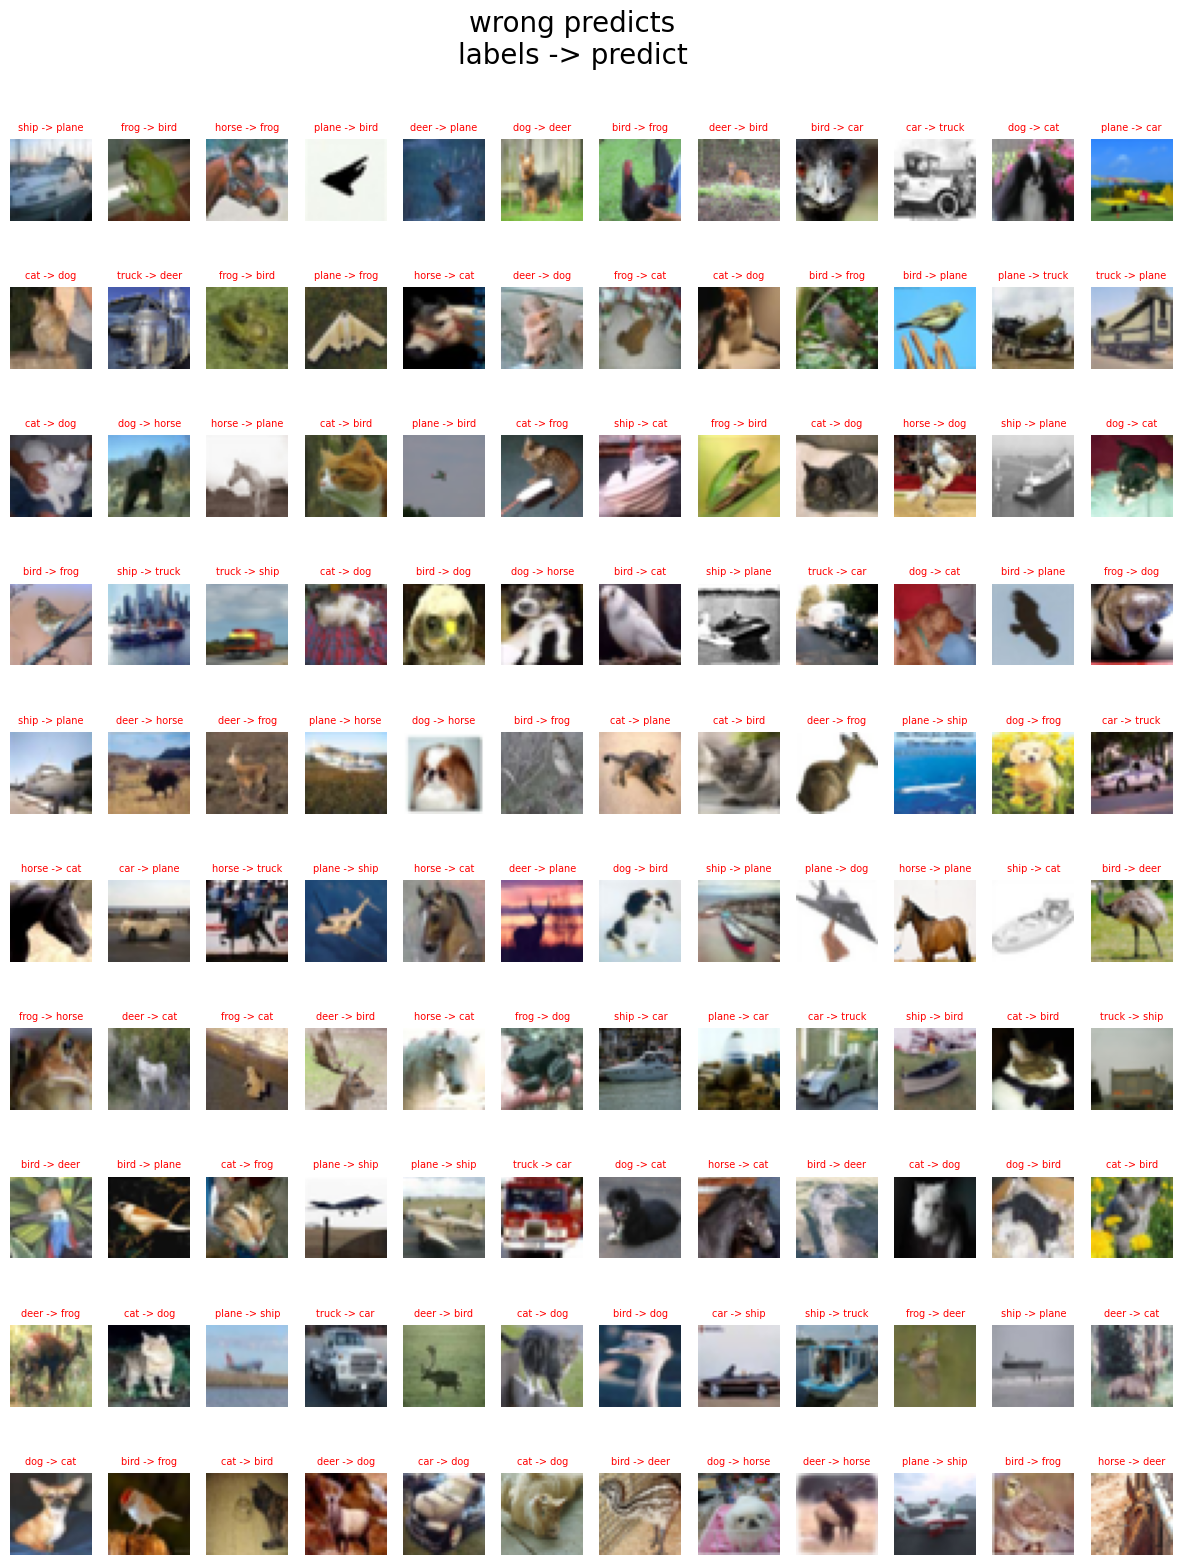

In [ ]:
plt.figure(figsize = (15,18))
for i in range(len(wrong_img)):
  plt.subplot(10, 12, i + 1)
  plt.imshow(wrong_img[i])
  plt.axis('off')
  plt.title(f'{label_name[wrong_label[i]]} -> {label_name[wrong_pred[i]]}', color = "red", fontsize = 7)
  if i > 118:
    break
plt.suptitle("wrong predicts\nlabels -> predict", fontsize = 20)
plt.subplots_adjust(top=0.92)
plt.show()

# Pytorch MNIST 분류

In [ ]:
import torch
from torch import nn
from torchvision import transforms, datasets

device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
import torch
from torchvision import datasets, transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))]
)

train_dataset = datasets.CIFAR10(root = './data', train = True, download = True, transform = transform)
val_dataset = datasets.CIFAR10(root = './data', train = False, transform = transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=32, drop_last=True)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=32, drop_last=True)

100%|██████████| 170498071/170498071 [00:12<00:00, 13186475.57it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


torch.Size([3, 32, 32])


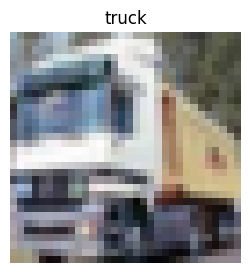

In [ ]:
plt.figure(figsize = (3,3))
for x, y in train_loader:
  imgs = x[1]
  print(imgs.shape)
  imgs = imgs / 2 + 0.5
  imgs = imgs.numpy()
  plt.imshow(np.transpose(imgs, (1,2,0)))
  plt.axis('off')
  plt.title(f'{label_name[y[1]]}')
  break

In [ ]:
class Simple_CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Sequential(
        nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3),
        nn.ReLU(),
        nn.BatchNorm2d(32)
    )
    self.conv2 = nn.Sequential(
        nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3),
        nn.ReLU(),
        nn.BatchNorm2d(64)
    )
    self.dense1 = nn.Sequential(
        nn.Linear(in_features = 64 * 28 * 28, out_features = 128),
        nn.ReLU()
    )
    # 파이토치의 nn.CrossEntropy는 softmax가 합쳐저 있으므로 따로 softmax층을 선언할 필요없음!!
    self.dense2 = nn.Linear(in_features = 128, out_features = 10)

  def forward(self, x):
    out = self.conv1(x)
    out = self.conv2(out)
    # flatten
    #out = out.reshape(out.size(0), -1)
    out = torch.flatten(out, 1)
    out = self.dense1(out)
    out = self.dense2(out)
    return out

In [ ]:
def train(model, loader, criterion, optimizer):
  '''
  학습을 위한 함수
  '''
  model.train()
  train_loss = 0.
  train_acc = 0.

  for X, y in loader:

    #X = X.view(32,1,28,28)
    X = X.to(device)
    y = y.to(device)

    y_hat = model(X)
    loss = criterion(y_hat, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # loss
    train_loss += loss.item()

    # acc
    pred = y_hat.max(1, keepdim = True)[1]
    train_acc += pred.eq(y.data.view_as(pred)).sum().item()

  train_loss  = train_loss / len(loader)
  train_acc = train_acc / len(loader.dataset)

  return train_loss, train_acc

def val(model, loader, criterion):
  '''
  검증을 위한 함수
  '''
  model.eval()
  val_loss = 0.
  val_acc = 0.

  with torch.no_grad():
    for X, y in loader:
      #X = X.view(32,1,28,28)
      X = X.to(device)
      y = y.to(device)

      y_hat = model(X)
      loss = criterion(y_hat, y)
      val_loss += loss.item()

      # acc
      pred = y_hat.max(1, keepdim = True)[1]
      val_acc += pred.eq(y.data.view_as(pred)).sum().item()

  val_loss  = val_loss / len(loader)
  val_acc = val_acc / len(loader.dataset)

  return val_loss, val_acc

In [ ]:
train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []

model = Simple_CNN().to(device)

epochs = 10
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss().to(device)

In [ ]:
st_loss = 1000

for epoch in range(epochs):
  print(f'########### epoch : {epoch + 1} ###########')
  train_loss, train_acc = train(model, train_loader, criterion, optimizer)
  val_loss, val_acc = val(model, val_loader, criterion)
  train_loss_list.append(train_loss)
  train_acc_list.append(train_acc)
  val_loss_list.append(val_loss)
  val_acc_list.append(val_acc)
  if val_loss < st_loss:
    print(f'* train_loss = {train_loss}, train_acc = {train_acc}, val_acc = {val_acc}')
    print(f'* val_loss가 향상되었습니다. {st_loss} ==> {val_loss}')
    st_loss = val_loss
    torch.save(model.state_dict(), '/content/pytorch_CNN.pt')
  else:
    print(f'* train_loss = {train_loss}, train_acc = {train_acc}, val_acc = {val_acc}')
    print(f'* val_loss가 향상되지 않았습니다, val_loss = {val_loss}')

########### epoch : 1 ###########
* train_loss = 1.2420448616395077, train_acc = 0.55872, val_acc = 0.632
* val_loss가 향상되었습니다. 1000 ==> 1.033503539287127
########### epoch : 2 ###########
* train_loss = 0.7176812166364794, train_acc = 0.75102, val_acc = 0.6527
* val_loss가 향상되지 않았습니다, val_loss = 1.0409023264088693
########### epoch : 3 ###########
* train_loss = 0.34610610790121416, train_acc = 0.893, val_acc = 0.6602
* val_loss가 향상되지 않았습니다, val_loss = 1.1607331794997056
########### epoch : 4 ###########
* train_loss = 0.11017696038615936, train_acc = 0.97504, val_acc = 0.6729
* val_loss가 향상되지 않았습니다, val_loss = 1.264852692396977
########### epoch : 5 ###########
* train_loss = 0.032993625054403036, train_acc = 0.99572, val_acc = 0.6773
* val_loss가 향상되지 않았습니다, val_loss = 1.3453705650873673
########### epoch : 6 ###########
* train_loss = 0.012119735243209136, train_acc = 0.99926, val_acc = 0.6851
* val_loss가 향상되지 않았습니다, val_loss = 1.3707482469005463
########### epoch : 7 ###########
* tr

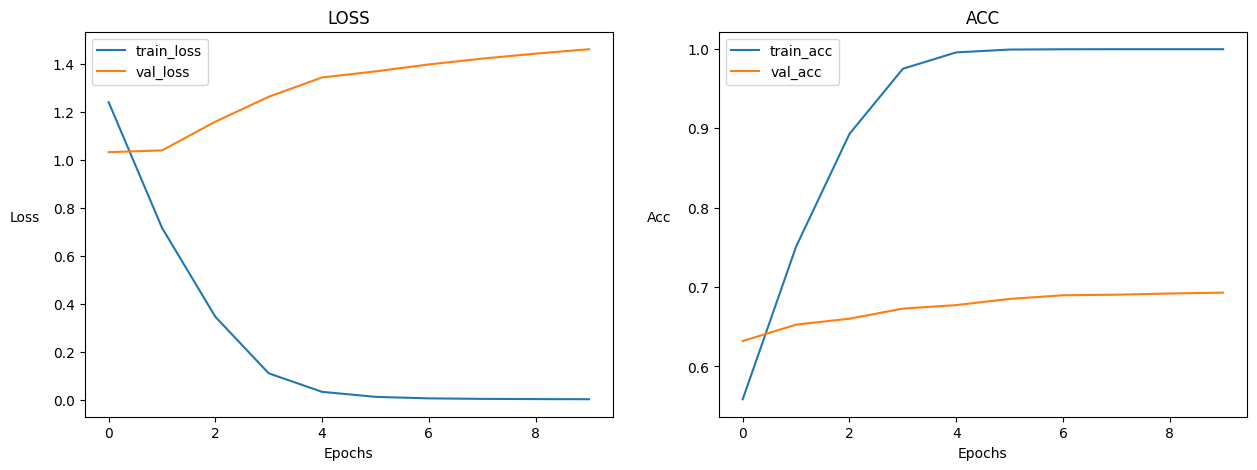

In [ ]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.plot(train_loss_list, label = 'train_loss')
plt.plot(val_loss_list, label = 'val_loss')
plt.legend()
plt.title('LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss', rotation = 360, labelpad = 20)

plt.subplot(1,2,2)
plt.plot(train_acc_list, label = 'train_acc')
plt.plot(val_acc_list, label = 'val_acc')
plt.legend()
plt.title('ACC')
plt.xlabel('Epochs')
plt.ylabel('Acc', rotation = 360, labelpad = 20)

plt.show()

In [ ]:
def batch_extractor(batch_no, loader, model):
  for i, data in enumerate(loader):
    x, y = data
    imgs = x.to(device)
    labels = y.numpy()
    if i == batch_no - 1:
      break
  model.eval()
  with torch.no_grad():
    preds = model(imgs).max(1, keepdim = True)[1].detach().to('cpu').numpy().reshape(-1)

  imgs = imgs.detach().to('cpu').numpy() / 2 + 0.5
  imgs = np.transpose(imgs, (0,2,3,1))

  extract_dict = {}
  extract_dict['imgs'] = imgs
  extract_dict['labels'] = labels
  extract_dict['preds'] = preds
  return extract_dict

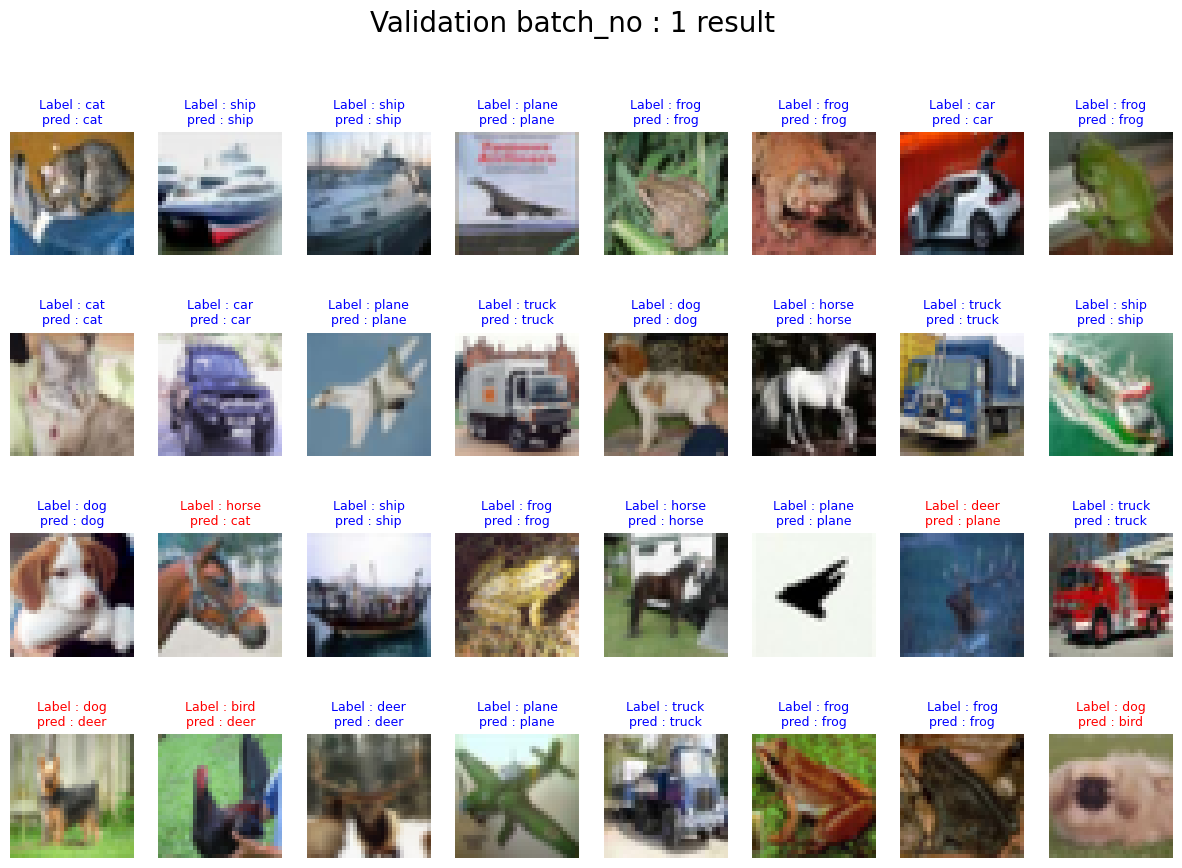

In [ ]:
batch_no = 1
extract_dict = batch_extractor(batch_no = batch_no, loader = val_loader, model = model)
plt.figure(figsize = (15,10))
for i in range(32):
  plt.subplot(4,8,i+1)
  plt.imshow(extract_dict['imgs'][i])
  if extract_dict['preds'][i] == extract_dict['labels'][i]:
    color = "blue"
  else:
    color = "red"
  plt.title(f'Label : {label_name[extract_dict["labels"][i]]}\npred : {label_name[extract_dict["preds"][i]]}', color = color, fontsize = 9)
  plt.axis('off')
plt.suptitle(f'Validation batch_no : {batch_no} result', fontsize = 20)
plt.show()

In [ ]:
labels = []
preds = []

model.eval()
with torch.no_grad():
  for img, label in val_loader:
    labels.append(label.numpy())

    img = img.to(device)
    pred = model(img).max(1, keepdim = True)[1].detach().to('cpu').numpy().reshape(-1)
    preds.append(pred)

preds = np.array(preds).reshape(-1)
labels = np.array(labels).reshape(-1)

In [ ]:
tmp_df = pd.DataFrame(np.zeros(10).T)
conf_df = pd.DataFrame()
for i in range(10):
  conf_df = pd.concat([conf_df, tmp_df], axis = 1)
conf_df.index = [i for i in range(10)]
conf_df.columns = [i for i in range(10)]

for i in range(len(labels)):
  conf_df.loc[labels[i], preds[i]] += 1
conf_df = conf_df.astype(int)
conf_df.index = label_name
conf_df.columns = label_name
conf_df

plane  car  bird  cat  deer  dog  frog  horse  ship  truck
plane    751   27    44   23    16   11    10     10    69     37
car       20  807    12   13     1    3    10      2    33     98
bird      80    8   557   73    91   60    66     41    11     12
cat       24   13    76  484    70  184    81     33    13     19
deer      30    7    73   70   640   20    68     74    14      4
dog       18    9    58  158    52  602    27     62     4      7
frog      12    5    51   47    41   22   801      7     7      7
horse     20   10    45   44    67   65    11    716     1     18
ship      68   41    13   22     2    9     6      4   802     30
truck     40   82    15   15     8    6    10     23    31    770

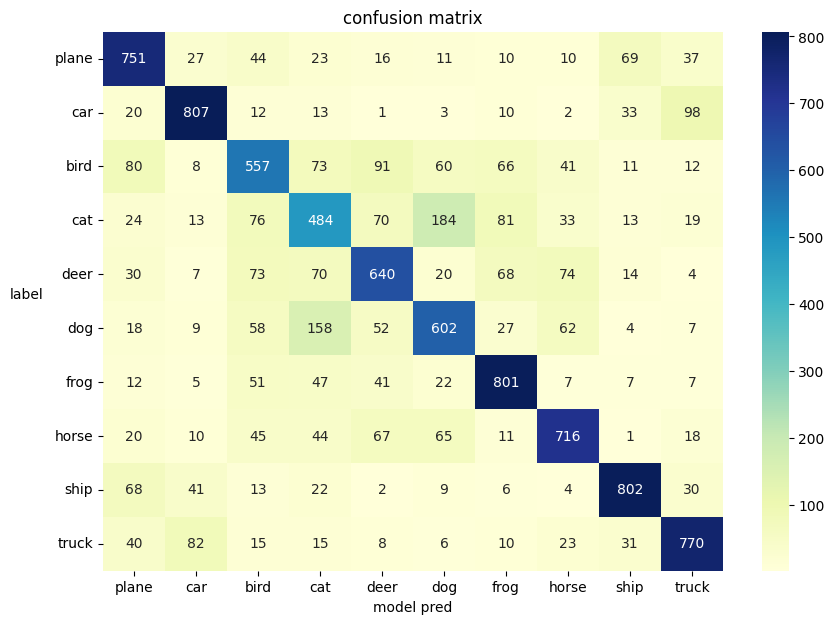

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(conf_df, annot = True, fmt = 'd', cmap='YlGnBu')
plt.yticks(rotation = 360)
plt.xlabel('model pred')
plt.ylabel('label', rotation = 360, labelpad = 20)
plt.title('confusion matrix')
plt.show()

In [ ]:
wrong_img = []
wrong_label = []
wrong_pred = []

for data in val_loader:
  x, y = data
  imgs = x.to(device)
  labels = y.numpy()
  model.eval()
  with torch.no_grad():
    preds = model(imgs).max(1, keepdim = True)[1].detach().to('cpu').numpy().reshape(-1)
  imgs = imgs.detach().to('cpu').numpy() / 2 + 0.5
  imgs = np.transpose(imgs, (0,2,3,1))

  for i in range(len(preds)):
    if preds[i] != labels[i]:
      wrong_img.append(imgs[i])
      wrong_label.append(labels[i])
      wrong_pred.append(preds[i])
wrong_img = np.array(wrong_img)
wrong_label = np.array(wrong_label)
wrong_pred = np.array(wrong_pred)

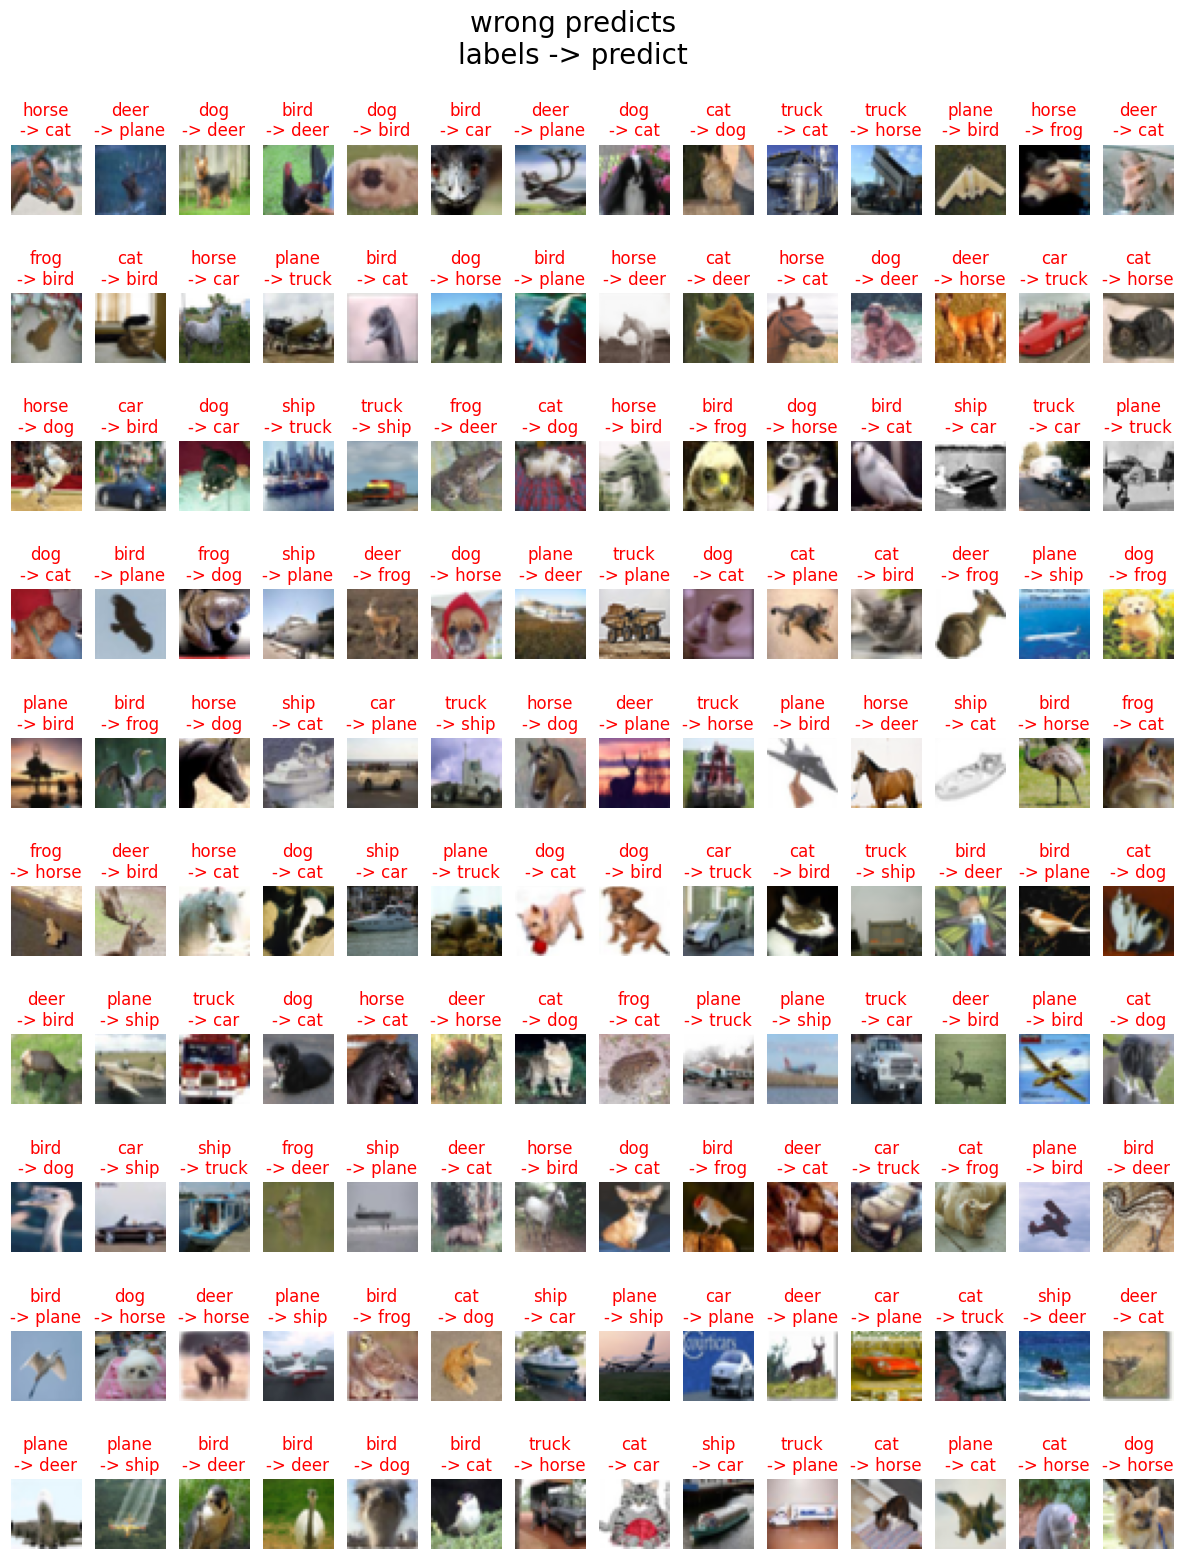

In [ ]:
plt.figure(figsize = (15,18))
for i in range(len(wrong_img)):
  plt.subplot(10, 14, i + 1)
  plt.imshow(wrong_img[i], cmap = plt.cm.binary)
  plt.axis('off')
  plt.title(f'{label_name[wrong_label[i]]}\n-> {label_name[wrong_pred[i]]}', color = "red")
  if i > 138:
    break
plt.suptitle("wrong predicts\nlabels -> predict", fontsize = 20)
plt.subplots_adjust(top=0.92)
plt.show()